In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def odeEuler(f,y0,t):
    '''Approximate the solution of y'=f(y,t) by Euler's method.

    Parameters
    ----------
    f : function
        Right-hand side of the differential equation y'=f(t,y), y(t_0)=y_0
    y0 : number
        Initial value y(t0)=y0 wher t0 is the entry at index 0 in the array t
    t : array
        1D NumPy array of t values where we approximate y values. Time step
        at each iteration is given by t[n+1] - t[n].

    Returns
    -------
    y : 1D NumPy array
        Approximation y[n] of the solution y(t_n) computed by Euler's method.
    '''
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

[1.         1.         1.04       1.1232     1.257984   1.45926144]


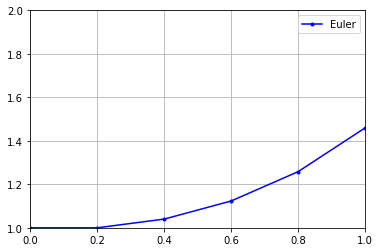

In [3]:
t = np.linspace(0,1,6)
y0 = 1
f = lambda y,t: y*t
y = odeEuler(f,y0,t)
print(y)
plt.plot(t,y,'b.-')
plt.legend(['Euler'])
plt.axis([0,1,1,2])
plt.grid(True)
plt.show()


[[1.        ]
 [1.02020147]
 [1.08328722]
 [1.19721756]
 [1.377128  ]
 [1.64872159]]


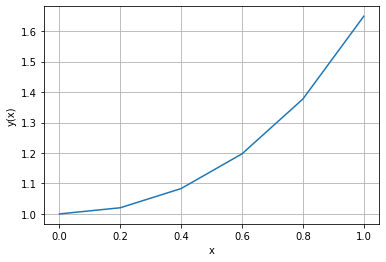

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# function that returns dy/dt
def model(y,t): 
    dydt = y*t
    return dydt
# initial condition
y0 = 1
# time points
t = np.linspace(0,1,6)
# solve ODE
y = odeint(model,y0,t)
print(y)
# plot results
plt.plot(t,y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.show()

In [5]:
import sympy as sym
import scipy as sp
import matplotlib.pyplot as plt
x = sym.symbols('x')
f= sym.symbols('f', cls=sym.Function)
sol=sym.dsolve(f(x).diff(x)-f(x)*x, 0)
sol

Eq(f(x), C1*exp(x**2/2))

In [6]:
constants = sym.solve([sol.rhs.subs(x,0) - 1])#condição inicial y(0)=1
constants


{C1: 1}

In [9]:
C1= sym.symbols('C1')
sol = sol.subs(constants)
sol

Eq(f(x), exp(x**2/2))

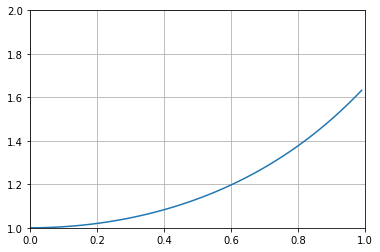

In [12]:
func = sym.lambdify(x,sol.rhs,'numpy')
t = sp.arange(0,1,.01) # name = t so it won't collide with symbol x
y = func(t)
plt.figure(1)
plt.axis([0,1,1,2])
plt.grid(True)
plt.plot(t,y);